In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
disasters_data = np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                         3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                         2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                         1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                         0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                         3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [26]:
from pymc3 import Model, DiscreteUniform, Exponential, Deterministic, Poisson, sample, traceplot, summary
from pymc3.math import switch

In [6]:
from pymc3.distributions import discrete
discrete.__all__

['Binomial',
 'BetaBinomial',
 'Bernoulli',
 'DiscreteWeibull',
 'Poisson',
 'NegativeBinomial',
 'ConstantDist',
 'Constant',
 'ZeroInflatedPoisson',
 'ZeroInflatedBinomial',
 'ZeroInflatedNegativeBinomial',
 'DiscreteUniform',
 'Geometric',
 'Categorical',
 'OrderedLogistic']

In [7]:
n_years = len(disasters_data)

In [11]:
n_years

111

# Priors + likelihood

In [13]:
with Model() as disaster_model:
    
    #### PRIORS
    switchpoint = DiscreteUniform("swithchpoint", lower=0, upper=n_years)
    
    early_mean = Exponential("early_mean", 1)
    late_mean = Exponential("late_mean", 1)
    
    rate = Deterministic("rate", switch(switchpoint >= np.arange(n_years), early_mean, late_mean))
    
    #### LIKELIHOOD 
    # data go here 
    disasters = Poisson("disaster", mu=rate, observed=disasters_data)

In [14]:
disaster_model.vars

[swithchpoint, early_mean_log__, late_mean_log__]

In [15]:
disaster_model.deterministics

[early_mean, late_mean, rate]

# MCMC

In [17]:
with disaster_model:
    trace = sample(5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [swithchpoint]
>NUTS: [late_mean, early_mean]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:07<00:00, 2995.07draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e9719e8>,
      dtype=object)

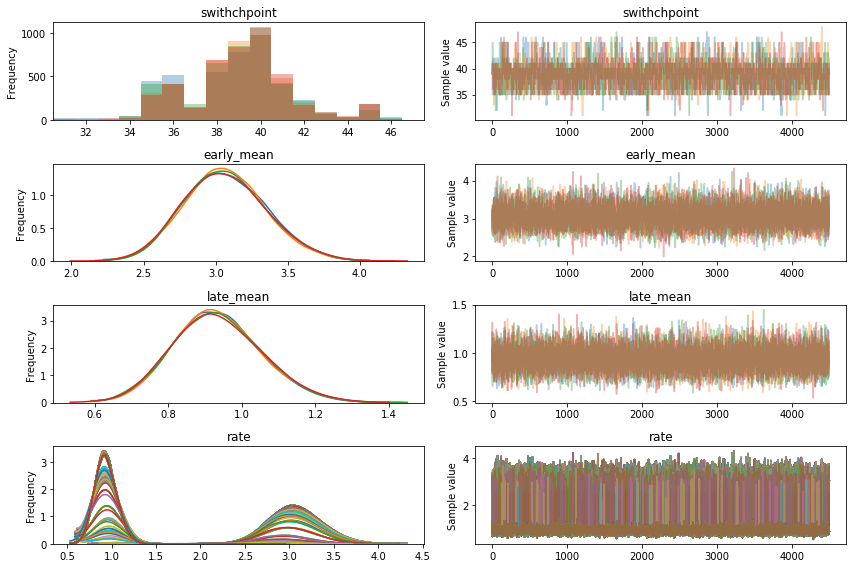

In [20]:
traceplot(trace[500:])

In [25]:
trace["early_mean"].shape

(20000,)

In [28]:
summary(trace[500:], varnames=["swithchpoint", "early_mean", "late_mean"])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
swithchpoint,39.016611,2.459946,0.051232,34.000000,44.000000,2148.284123,1.000899
early_mean,3.066450,0.284042,0.002517,2.519161,3.626520,10431.699441,1.000099
late_mean,0.934398,0.118228,0.000944,0.707106,1.169909,12706.186543,0.999919
